<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Class     283 non-null    int64  
 1   shape1    283 non-null    float64
 2   shape2    283 non-null    float64
 3   shape3    283 non-null    float64
 4   shape4    283 non-null    float64
 5   shape5    283 non-null    float64
 6   shape6    283 non-null    float64
 7   shape7    283 non-null    float64
 8   texture1  283 non-null    float64
 9   texture2  283 non-null    float64
 10  texture3  283 non-null    float64
 11  texture4  283 non-null    float64
 12  texture5  283 non-null    float64
 13  texture6  283 non-null    float64
 14  texture7  283 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 33.3 KB
None


Text(0.5, 1.0, 'The correlation of variables and target in a heatmap')

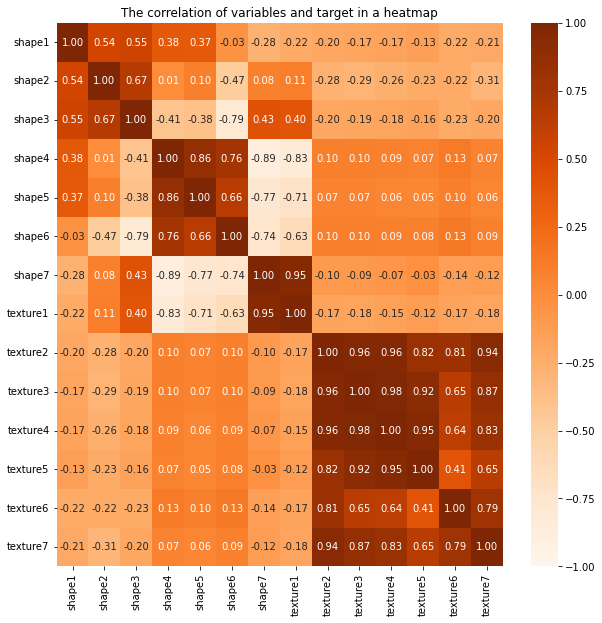

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Load the data
train_set = pd.read_csv('./train.csv')
test_set = pd.read_csv('./test.csv')
train_set = train_set.drop(['Id', 'Scientific Name'], axis=1)
test = test_set.drop(['Id'], axis=1)

# Data information
print(train_set.info())

# Split features and targets
train = train_set.drop(['Class'], axis=1)
y_train = train_set['Class']

# Correlation
corr = train.corr()
# heatmap
plt.subplots(figsize=(10, 10))
sns.heatmap(corr, vmin = -1, vmax = 1, annot=True, fmt='.2f', cmap = 'Oranges')
plt.title('The correlation of variables and target in a heatmap')

In [2]:
X_train = train.drop(['shape1', 'shape2', 'shape4', 'shape5', 'texture1', 'texture2', 'texture3', 'texture5', 'texture6'], axis=1)
X_train['shape3'] = (train['shape1'] + train['shape2'] + train['shape3']) / 3
X_train['shape6'] = (train['shape4'] + train['shape5'] + train['shape6']) / 3
X_train['texture7'] = (train['texture5'] + train['texture6'] + train['texture7']) / 3

X_test = test.drop(['shape1', 'shape2', 'shape4', 'shape5', 'texture1', 'texture2', 'texture3', 'texture5', 'texture6'], axis=1)
X_test['shape3'] = (test['shape1'] + test['shape2'] + test['shape3']) / 3
X_test['shape6'] = (test['shape4'] + test['shape5'] + test['shape6']) / 3
X_test['texture7'] = (test['texture5'] + test['texture6'] + test['texture7']) / 3

In [3]:
# Logistic Regression
logreg_l = LogisticRegression(penalty='l2', multi_class='multinomial' ,solver='lbfgs', C=1000, random_state=0)
logreg_l.fit(X_train, y_train)

# Prediction
logreg_l_pred_test = logreg_l.predict(X_test)
# Probability Prediction
logreg_l_pred_prob_test = logreg_l.predict_proba(X_test)

In [4]:
# Logloss
logloss = 0
for i in range(len(test)):
    logloss += np.log(logreg_l_pred_prob_test[i][logreg_l_pred_test[i]-1])
logloss = -logloss / len(test)
print('Logloss:', logloss)

Logloss: 0.6338852384263739


In [5]:
# Store
df = pd.DataFrame(logreg_l_pred_prob_test, index=test_set['Id'], columns=np.array(range(1, 31)))
df.to_csv('./result.csv', sep=',', index=True, header=True)